In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.shape

(6362620, 11)

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

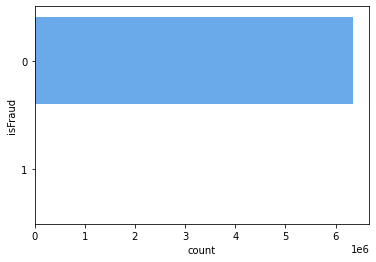

In [8]:
sns.countplot(y = df['isFraud'], palette='cool');

Target Variable is highly Imbalanced.

<AxesSubplot:xlabel='isFraud', ylabel='isFlaggedFraud'>

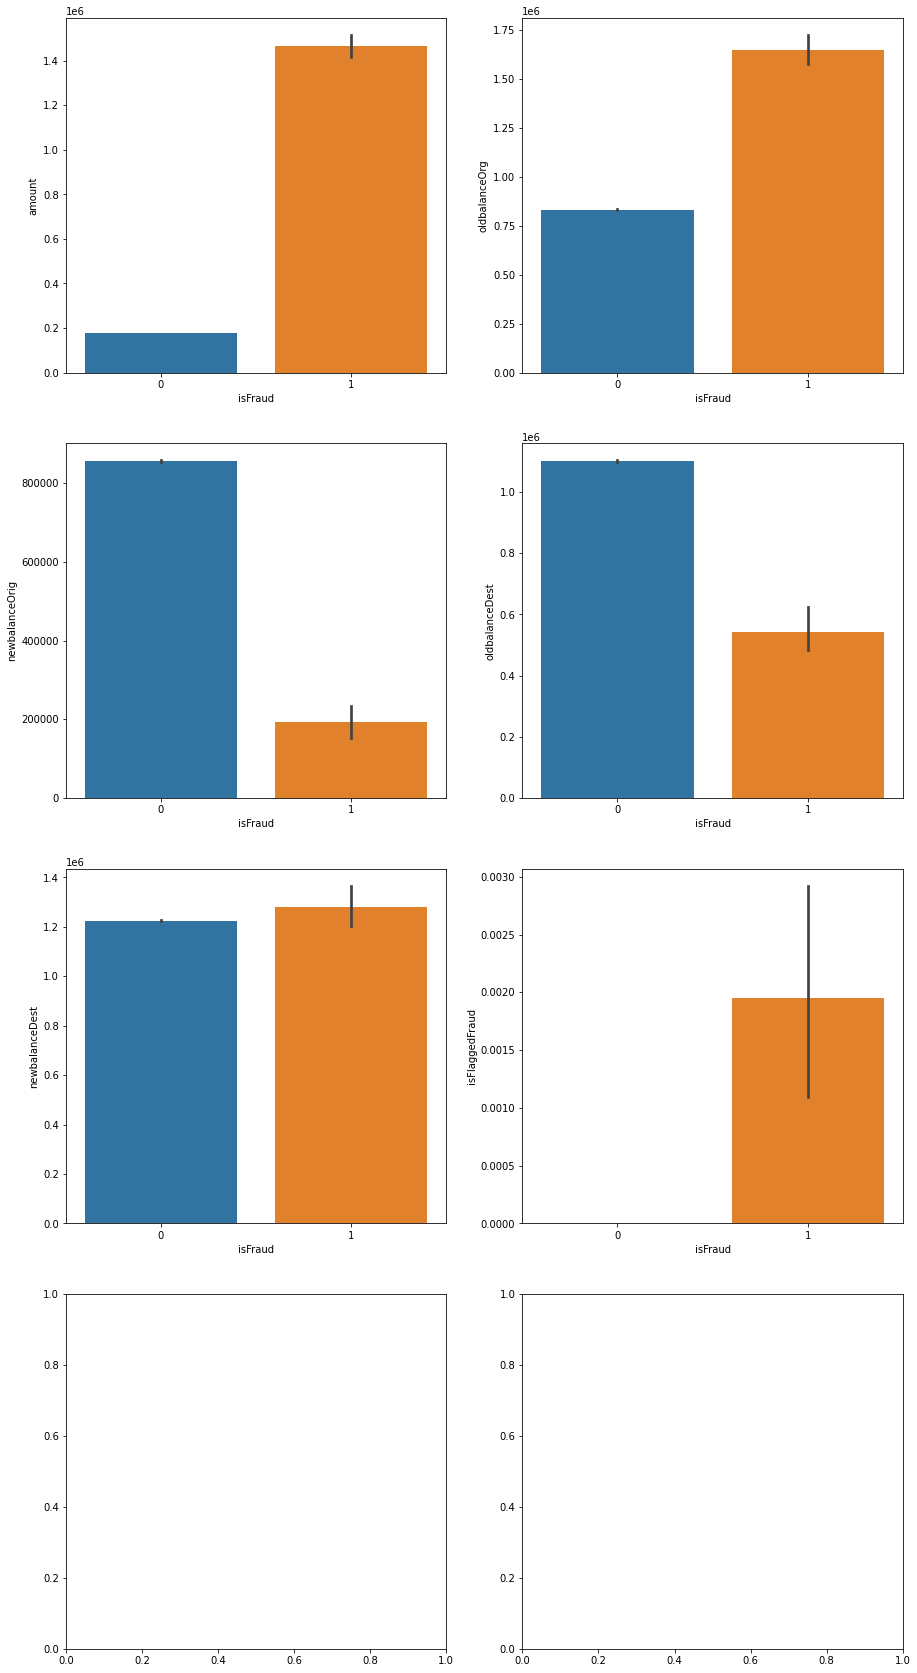

In [9]:
fig,ax=plt.subplots(4,2,figsize=(15,30))
sns.barplot(x=df.isFraud,y=df['amount'],ax=ax[0][0])
sns.barplot(x=df.isFraud,y=df['oldbalanceOrg'],ax=ax[0][1])
sns.barplot(x=df.isFraud,y=df['newbalanceOrig'],ax=ax[1][0])
sns.barplot(x=df.isFraud,y=df['oldbalanceDest'],ax=ax[1][1])
sns.barplot(x=df.isFraud,y=df['newbalanceDest'],ax=ax[2][0])
sns.barplot(x=df.isFraud,y=df['isFlaggedFraud'],ax=ax[2][1])

## Outliers

<AxesSubplot:xlabel='amount'>

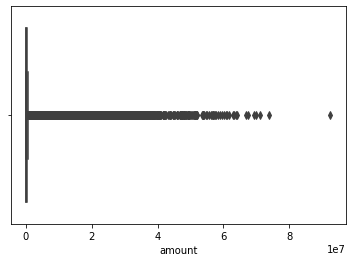

In [10]:
sns.boxplot(x=df["amount"])

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

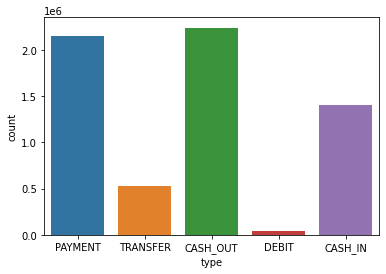

In [11]:
sns.countplot(df['type'])

In [12]:
print("Total Unique Values in nameOrig", df['nameOrig'].nunique())

Total Unique Values in nameOrig 6353307


In [13]:
print("Total Unique Values in nameDest", df['nameDest'].nunique())

Total Unique Values in nameDest 2722362


### Observations:-
1.Amount Column has Outliers

2.Debit type transaction count is very small

3.Total Unique values in nameOrig is 6353307

4.Total Unique values in nameDest is 2722362

## Multi-Collinearity Checking

In [14]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_without_text=pd.DataFrame({"step":df.step,
                                "amount":df.amount,
                               "oldbalanceOrg":df.oldbalanceOrg,
                               "newbalanceOrig":df.newbalanceOrig,
                               "oldbalanceDest":df.oldbalanceDest,
                               "newbalanceDest":df.newbalanceDest,
                               "isFraud":df.isFraud,
                               "isFlaggedFraud":df.isFlaggedFraud})
vif_data = pd.DataFrame()
vif_data["feature"] = data_without_text.columns
  
vif_data["VIF"] = [variance_inflation_factor(data_without_text.values, i)
                          for i in range(len(data_without_text.columns))]
  
print(vif_data)

          feature         VIF
0            step    1.191094
1          amount    4.078952
2   oldbalanceOrg  544.053103
3  newbalanceOrig  546.346008
4  oldbalanceDest   72.895522
5  newbalanceDest   84.584619
6         isFraud    1.188386
7  isFlaggedFraud    1.002546


## Observations
#### Issue:

1.Here oldbalanceorg and newbalanceorig has high vif so these are creating multi-collinearity

2.oldbalanceDest and newbalanceDest also has multi-collinearity.

#### Prevention:

1.we will remove oldbalnceorg and newbalaceorig and and add the difference of column in the data set.

2.do the same thing for this also

In [16]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [17]:
from tqdm import tqdm

In [18]:
old_balance=df["oldbalanceOrg"]
new_balance=df["newbalanceOrig"]
bal_change=[] #if balace deduct then 1 else 0
for i in tqdm(range(len(old_balance))):
  diff=new_balance[i]-old_balance[i]
  if diff>0:
      bal_change.append(0)
  else:
      bal_change.append(1)
        

100%|████████████████████████████████████████████████████████████████████| 6362620/6362620 [00:27<00:00, 233076.99it/s]


In [19]:
dest_old=df["oldbalanceDest"]
dest_new=df["newbalanceDest"]
dest_bal_change=[]
dest_bal=[]
for i in tqdm(range(len(dest_old))):
    diff=dest_new[i]-dest_old[i]
    if diff>0:
        dest_bal_change.append(0)
        dest_bal.append(abs(diff))
    else:
        dest_bal_change.append(1)
        dest_bal.append(abs(diff))


100%|████████████████████████████████████████████████████████████████████| 6362620/6362620 [00:28<00:00, 226910.57it/s]


In [20]:
df["source_bal_change"]=bal_change
df["destination"]=dest_bal
df["dest_bal_chnage"]=dest_bal_change

In [21]:
df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1,inplace=True)

In [22]:
df.head(2)

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0,1,0.0,1
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0,1,0.0,1


## Checking Colinearity on Data after Featurization

#### Note:-There are too many data in data set(6,362,620). It takes too many time to process by my laptop. So I reduced them to 60,000.

In [23]:
df1=df.sample(n=60000, random_state=0)

In [24]:
result=df1["isFraud"]
df1.drop("isFraud",axis=1,inplace=True)

In [25]:
True_fraud=np.sum(result==1)
False_fraud=np.sum(result==0)
print(True_fraud)
print(False_fraud)

76
59924


## Observation
1.we can clealy see that here the data is imbalaced

2.We will do downsampling on the data basically here the size of True_fraud and False_fraud will be same

3.But Firsly we will check with imabalance Dat

## Working With Imbalanced Data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1,result,test_size=0.20,random_state=42)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 9)
(12000, 9)
(48000,)
(12000,)


## Categorical Data

In [28]:
from sklearn import preprocessing   #LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(df1["type"])
train_type=le.transform(x_train["type"])
test_type=le.transform(x_test["type"])

In [29]:
le2=preprocessing.LabelEncoder()
le2.fit(df1["nameOrig"])
train_nameOrig=le2.transform(x_train["nameOrig"])
test_nameOrig=le2.transform(x_test["nameOrig"])

In [30]:
le3=preprocessing.LabelEncoder()
le3.fit(df1["nameDest"])
train_nameDest=le3.transform(x_train["nameDest"])
test_nameDest=le3.transform(x_test["nameDest"])

In [31]:
x_train.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [32]:
x_train["type"]=train_type
x_train["nameOrig"]=train_nameOrig
x_train["nameDest"]=train_nameDest

In [33]:
x_train.head(2)

,step,amount,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage,type,nameOrig,nameDest
5386925,376,231571.74,0,0,231571.74,1,0,21371,12274
2577737,207,980855.07,0,1,980855.07,0,4,57886,27016


In [34]:
x_test.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [35]:
x_test["type"]=test_type
x_test["nameOrig"]=test_nameOrig
x_test["nameDest"]=test_nameDest

In [36]:
x_test.head(2)

,step,amount,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage,type,nameOrig,nameDest
3729451,278,5456.26,0,1,0.00,1,3,39493,39119
461788,19,8480.40,0,0,353289.93,1,0,27007,20873


### Here i am going to use Xgboost for train the model
Beacuse:

1.Feature scaling is not important in xgboost as here amount can be in any currency

2.in above we see that amount Data has very much outliers and xgboost is not influenced by outliers

## HyperParameter Tuning on xgboost

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [38]:
import xgboost as xgb
xgb_model  = xgb.XGBClassifier()

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,2,3,4] }
clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

Best Parameter {'max_depth': 2}


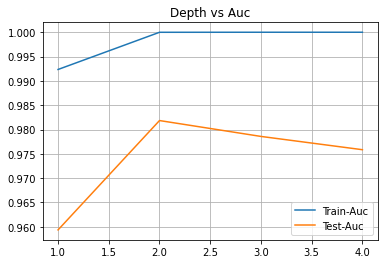

In [40]:
import matplotlib.pyplot as plt
max_depth=[1,2,3,4]
df=pd.DataFrame.from_dict(clf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
plt.grid()
plt.plot(max_depth,train_auc,label="Train-Auc")
plt.plot(max_depth,test_auc,label="Test-Auc")
plt.legend()
plt.title("Depth vs Auc")
print("Best Parameter",clf.best_params_)

## Model

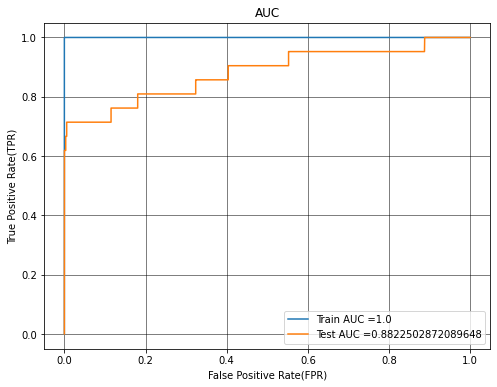

In [41]:
from sklearn.metrics import roc_curve, auc

model_set=xgb.XGBClassifier(max_depth=4)
model_set.fit(x_train,y_train)
y_train_probs = model_set.predict_proba(x_train)[:,1] # converting train and test output into probability
y_test_probs= model_set.predict_proba(x_test)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)

In [42]:
def find_best_threshold(threshould, fpr, tpr):
 t = threshould[np.argmax(tpr*(1-fpr))]
 print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
 return t
def predict_with_best_t(proba, threshould):
  prediction=[]
  for i in proba:
    if i>=threshould:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction

In [43]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
l=predict_with_best_t(y_train_probs, best_t)
k=confusion_matrix(y_train,l)
print(k)

the maximum value of tpr*(1-fpr) 1.0 for threshold 0.644
Train confusion matrix
[[47945     0]
 [    0    55]]


<AxesSubplot:title={'center':'Train data '}>

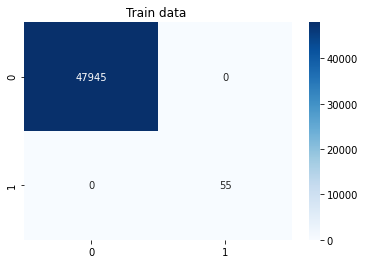

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Train data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Blues')

In [45]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
print("Test confusion matrix")
l=predict_with_best_t(y_test_probs, best_t)
k=confusion_matrix(y_test,l)
print(k)

the maximum value of tpr*(1-fpr) 0.7101713713283961 for threshold 0.002
Test confusion matrix
[[11910    69]
 [    6    15]]


<AxesSubplot:title={'center':'Test data '}>

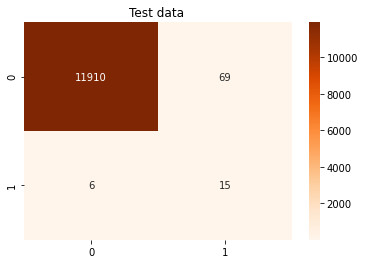

In [46]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Test data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Oranges')

## Observations
1.Here the accuracy is very high for both train data and test data

2.But if we check the confusion matrix we can observe that number of turely classified "isfraud" is very less

3.As we it is an imbalaced data we can't totaly depend on this output for this we have to make the daat balance then we have check the output

# Working with balanced Data

In [47]:
df = pd.read_csv("Fraud.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [49]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [50]:
result=df["isFraud"]
df.drop("isFraud",axis=1,inplace=True)

In [51]:
pip install imblearn

You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [52]:
from imblearn.under_sampling import RandomUnderSampler  
                                                          #Doing Under sampling to make data balance
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(df,result)

In [53]:
True_fraud=np.sum(y_res==1)
False_fraud=np.sum(y_res==0)
print(True_fraud)
print(False_fraud)

8213
8213


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [55]:
X_res.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,186,PAYMENT,3479.86,C620638956,0.0,0.0,M541132361,0.00,0.00,0
1,43,PAYMENT,3882.86,C664934151,0.0,0.0,M120425618,0.00,0.00,0
2,18,CASH_OUT,360983.82,C1003671868,79.0,0.0,C508363672,219322.78,580306.59,0
3,136,PAYMENT,2827.04,C1562890304,0.0,0.0,M1342149941,0.00,0.00,0
4,41,CASH_OUT,52638.74,C702090020,924.0,0.0,C222614065,1661200.90,1713839.64,0


In [56]:
y_res.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [57]:
le = preprocessing.LabelEncoder()
le.fit(df["type"])
train_type=le.transform(x_train["type"])
test_type=le.transform(x_test["type"])

In [58]:
le2=preprocessing.LabelEncoder()
le2.fit(df["nameOrig"])
train_nameOrig=le2.transform(x_train["nameOrig"])
test_nameOrig=le2.transform(x_test["nameOrig"])

In [59]:
le3=preprocessing.LabelEncoder()
le3.fit(df["nameDest"])
train_nameDest=le3.transform(x_train["nameDest"])
test_nameDest=le3.transform(x_test["nameDest"])

In [60]:
x_train.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [61]:
x_train["type"]=train_type
x_train["nameOrig"]=train_nameOrig
x_train["nameDest"]=train_nameDest

In [62]:
x_test.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [63]:
x_test["type"]=test_type
x_test["nameOrig"]=test_nameOrig
x_test["nameDest"]=test_nameDest

In [64]:
import xgboost as xgb
xgb_model  = xgb.XGBClassifier()

In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,2,3,4] }
clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

Best Parameter {'max_depth': 4}


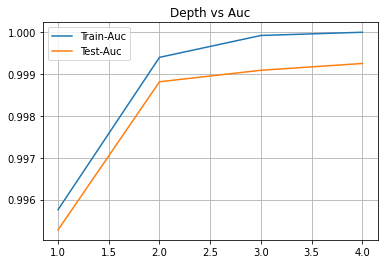

In [66]:
import matplotlib.pyplot as plt
max_depth=[1,2,3,4]
df=pd.DataFrame.from_dict(clf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
plt.grid()
plt.plot(max_depth,train_auc,label="Train-Auc")
plt.plot(max_depth,test_auc,label="Test-Auc")
plt.legend()
plt.title("Depth vs Auc")
print("Best Parameter",clf.best_params_)

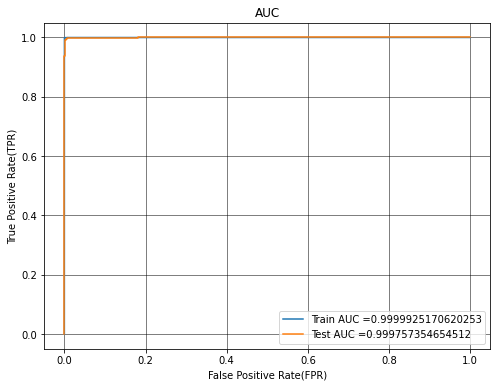

In [67]:
from sklearn.metrics import roc_curve, auc

model_set=xgb.XGBClassifier(max_depth=4)
model_set.fit(x_train,y_train)
y_train_probs = model_set.predict_proba(x_train)[:,1] # converting train and test output into probability
y_test_probs= model_set.predict_proba(x_test)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)

In [68]:
def find_best_threshold(threshould, fpr, tpr):
 t = threshould[np.argmax(tpr*(1-fpr))]
 print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
 return t
def predict_with_best_t(proba, threshould):
  prediction=[]
  for i in proba:
    if i>=threshould:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction

In [69]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
l=predict_with_best_t(y_train_probs, best_t)
k=confusion_matrix(y_train,l)
print(k)

the maximum value of tpr*(1-fpr) 0.9978710693957011 for threshold 0.671
Train confusion matrix
[[6563    1]
 [  13 6563]]


<AxesSubplot:title={'center':'Train data '}>

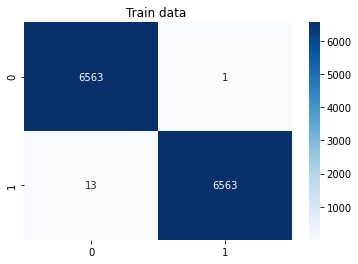

In [70]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Train data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Blues')

In [71]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
print("Test confusion matrix")
l=predict_with_best_t(y_test_probs, best_t)
k=confusion_matrix(y_test,l)
print(k)

the maximum value of tpr*(1-fpr) 0.9927213805371761 for threshold 0.461
Test confusion matrix
[[1639   10]
 [   2 1635]]


## Note: 
Do not use accuracy score as a metric. In a dataset with 99.9% non-fraud observations, you will likely make correct prediction 99% of time. Confusion matrix and precision/recall score are better metric.

<AxesSubplot:title={'center':'Test data '}>

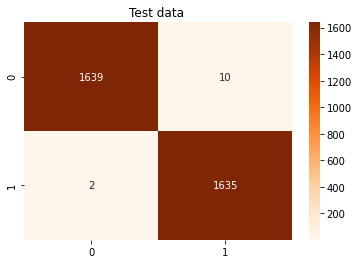

In [72]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Test data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Oranges')

## Observations
1.Here accuracy is very high

2.here from confusion matrix we can conclude that has very good value in Truepositive and TrueNegetive.

3.as it is a balanced data we can say that it will work well in unseen data

4.For prevention we should look into the FN values like if it is very high then we have add some other system the work on

#### 7. What kind of prevention should be adopted while company update its infrastructure?

Fraud Prevention and Detection: Fraud prevention and detection is a continuous, ongoing process and the key to prevention is to detect it right at the stage of origination on a real time basis. However, it is easier said than done. Machine learning (ML) and Artificial Intelligence (AL) algorithms offer an effective counter for fraud detection and prevention. Based on the learning from the historical patterns in data, current sets of transactions can be analysed before lending companies decide to proceed with a particular application.

Multiple variables relating to transactions such as income, location, employment history, education, digital identities (phone number and email id) will be analysed for the possibility of fabricated detail in the application form. Similarly, fraudsters also come up with newer ways to bypass the checks in place. Hence, for any company, making the algorithms better by training them on newer methods is important to stay ahead in the game. The use of reinforcement learning through machine learning algorithms can continuously take feedback from humans and learn to become increasingly accurate with time. However, it can be an expensive affair for small and medium size companies.Another ingenious way for small and medium size companies is to take a collaborative approach

#### 8. Assuming these actions have been implemented, how would you determine if they work?

Machine learning finds a perfect use case in fraud detection. Machine learning algorithms learn to tell fraudulent operations from legitimate ones without raising the suspicions of those executing the transactions. Machine learning can fight financial fraud by using big data better and faster than humans ever will be able to.
As The company will start using data science to prevent financial fraud. Machine learning is currently the most promising innovative tool that can help companies prevent fraudulent operations that lead to greater losses each year.
So through this process we can be able to check whether any fraud transaction is happening or not using our trained model and parralely increasing the efficiency of our model to provide some more information or more training data.
Luckily, machine learning has the potential to improve bank fraud detection with data analytics and help nearly every industry.

Note:And solution of other question i have already written in between the code wherever it has been implemented.